In [3]:
# Data Exploration and plot of our dataset  

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

file_path = os.path.join("..", "data", "lca_dataset.csv")

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(df.head())
else:
    print("File not found at:", file_path)


File loaded successfully!


,Process Stage,Technology,Time Period,Location,Functional Unit,Raw Material Type,Raw Material Quantity (kg or unit),Energy Input Type,Energy Input Quantity (MJ),Processing Method,...,GHG_per_Material,Time_Period_Numeric,Total_Cost,Circularity_Score,Circular_Economy_Index,Recycled Content (%),Resource Efficiency (%),Extended Product Life (years),Recovery Rate (%),Reuse Potential (%)
0,Transport,Conventional,2020-2025,South America,1 kg Copper Wire,Aluminium Scrap,1000,Electricity,2289.61,Conventional,...,1.08,2023,3763.25,50.66,0.51,74.52,74.77,26.8,9.00,0.09
1,Use,Emerging,2015-2019,Asia,1 m2 Aluminium Panel,Aluminium Ore,500,Electricity,7368.72,Emerging,...,1.05,2017,2063.83,26.93,0.27,10.00,11.83,46.4,93.64,25.18
2,Manufacturing,Advanced,2020-2025,North America,1 kg Copper Wire,Aluminium Scrap,1000,Coal,1586.35,Advanced,...,1.65,2023,2613.40,99.30,0.99,81.46,82.33,101.6,66.04,73.52
3,Use,Emerging,2010-2014,North America,1 m2 Aluminium Panel,Aluminium Ore,500,Natural Gas,7448.21,Emerging,...,6.46,2023,1995.41,23.49,0.23,10.00,12.30,69.3,85.74,39.43
4,Use,Conventional,2015-2019,South America,1 kg Aluminium Sheet,Aluminium Scrap,1000,Coal,1470.09,Conventional,...,2.13,2017,2565.81,100.00,1.00,75.85,76.84,23.1,62.67,90.20


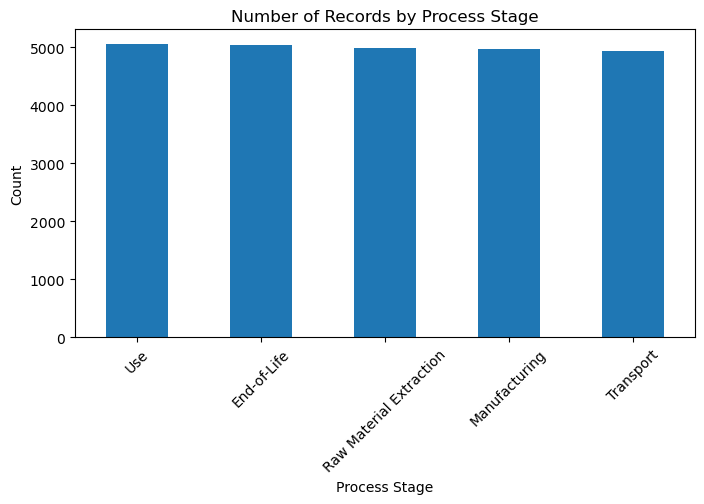

In [6]:
df["Process Stage"].value_counts().plot(kind="bar", figsize=(8,4))
plt.ylabel("Count")
plt.title("Number of Records by Process Stage")
plt.xticks(rotation=45)
plt.show()


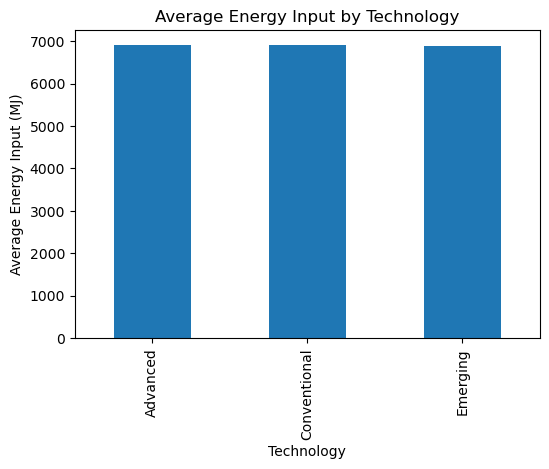

In [7]:
df.groupby("Technology")["Energy Input Quantity (MJ)"].mean().plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Energy Input (MJ)")
plt.title("Average Energy Input by Technology")
plt.show()


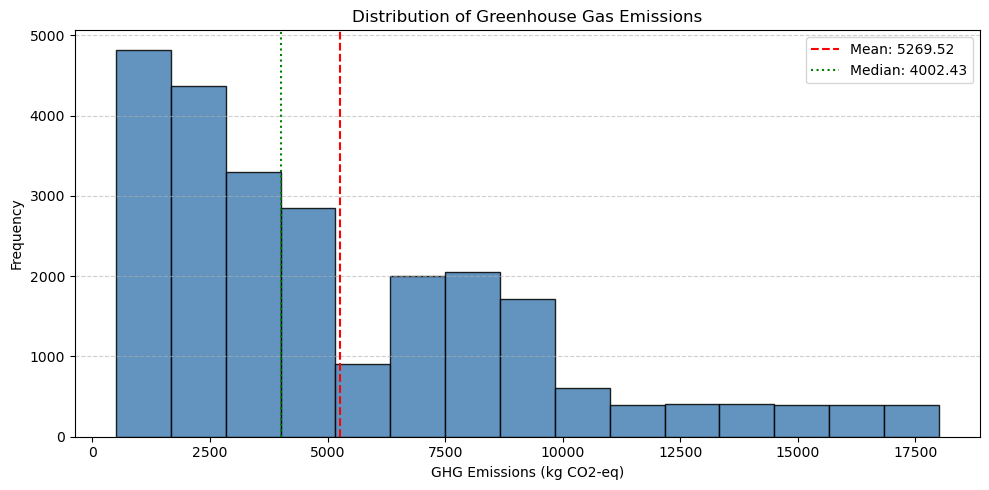

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["Greenhouse Gas Emissions (kg CO2-eq)"], 
         bins=15, 
         color="steelblue",  # darker and more solid than skyblue
         edgecolor="black", 
         alpha=0.85)

plt.axvline(df["Greenhouse Gas Emissions (kg CO2-eq)"].mean(), 
            color="red", linestyle="dashed", linewidth=1.5, 
            label=f"Mean: {df['Greenhouse Gas Emissions (kg CO2-eq)'].mean():.2f}")

plt.axvline(df["Greenhouse Gas Emissions (kg CO2-eq)"].median(), 
            color="green", linestyle="dotted", linewidth=1.5, 
            label=f"Median: {df['Greenhouse Gas Emissions (kg CO2-eq)'].median():.2f}")

plt.xlabel("GHG Emissions (kg CO2-eq)")
plt.ylabel("Frequency")
plt.title("Distribution of Greenhouse Gas Emissions")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("../images/ghg_emissions_histogram.png", dpi=300, bbox_inches="tight")
plt.show()


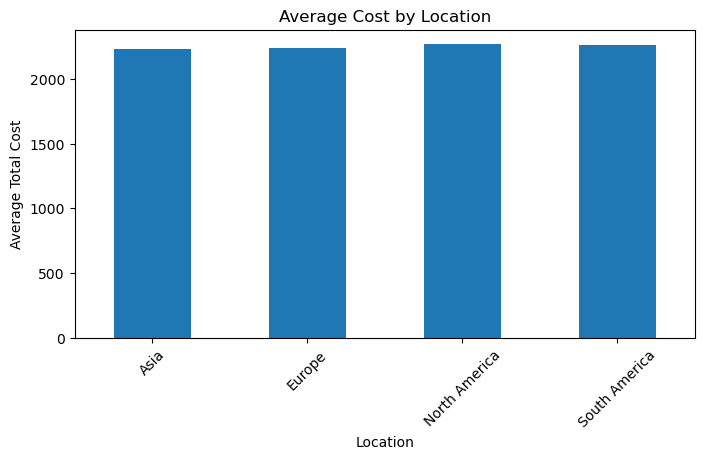

In [9]:
df.groupby("Location")["Total_Cost"].mean().plot(kind="bar", figsize=(8,4))
plt.ylabel("Average Total Cost")
plt.title("Average Cost by Location")
plt.xticks(rotation=45)
plt.show()


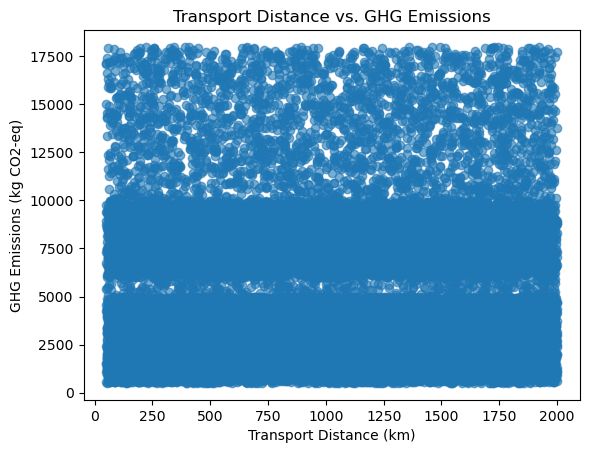

In [10]:
plt.scatter(df["Transport Distance (km)"], df["Greenhouse Gas Emissions (kg CO2-eq)"], alpha=0.6)
plt.xlabel("Transport Distance (km)")
plt.ylabel("GHG Emissions (kg CO2-eq)")
plt.title("Transport Distance vs. GHG Emissions")
plt.show()


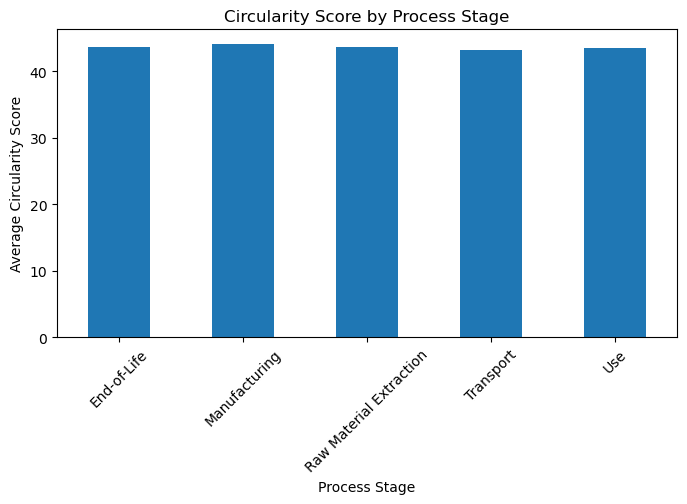

In [11]:
df.groupby("Process Stage")["Circularity_Score"].mean().plot(kind="bar", figsize=(8,4))
plt.ylabel("Average Circularity Score")
plt.title("Circularity Score by Process Stage")
plt.xticks(rotation=45)
plt.show()


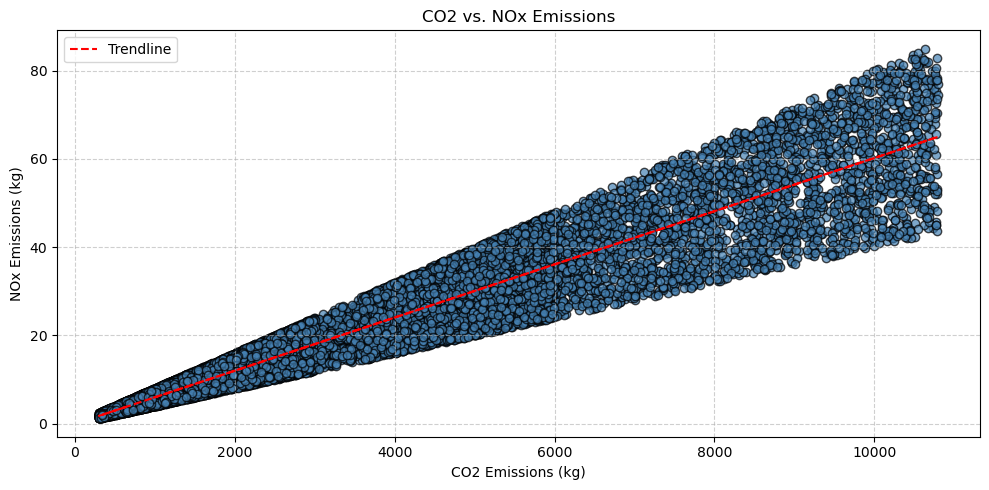

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = df["Emissions to Air CO2 (kg)"]
y = df["Emissions to Air NOx (kg)"]

plt.figure(figsize=(10,5))
plt.scatter(x, y, color="steelblue", edgecolor="black", alpha=0.7)

# Add a simple linear regression line (trendline)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="dashed", linewidth=1.5, label="Trendline")

plt.xlabel("CO2 Emissions (kg)")
plt.ylabel("NOx Emissions (kg)")
plt.title("CO2 vs. NOx Emissions")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

plt.savefig("../images/co2_vs_nox_scatter.png", dpi=300, bbox_inches="tight")
plt.show()


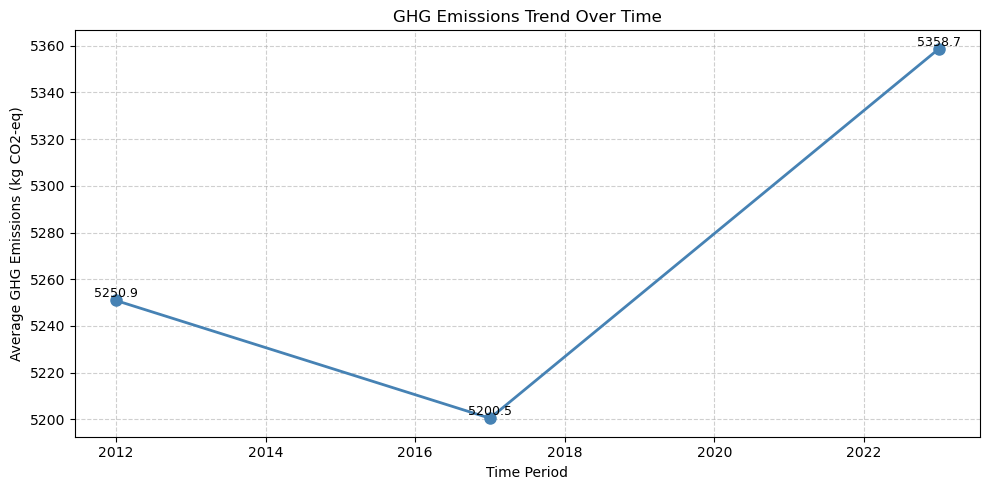

In [36]:
import matplotlib.pyplot as plt
import os

# Make sure images folder exists
os.makedirs("../images", exist_ok=True)

# Prepare data
df["Time_Period_Numeric"] = df["Time_Period_Numeric"].astype(int)
trend_data = df.groupby("Time_Period_Numeric")["Greenhouse Gas Emissions (kg CO2-eq)"].mean()

plt.figure(figsize=(10,5))
plt.plot(trend_data.index, trend_data.values, 
         marker="o", color="steelblue", linewidth=2, markersize=8)

# Add data labels on each point
for x, y in zip(trend_data.index, trend_data.values):
    plt.text(x, y, f"{y:.1f}", ha="center", va="bottom", fontsize=9)

plt.xlabel("Time Period")
plt.ylabel("Average GHG Emissions (kg CO2-eq)")
plt.title("GHG Emissions Trend Over Time")
plt.grid(linestyle="--", alpha=0.6)
plt.tight_layout()

# Save in ml_Alloyance/images/
# plt.savefig("../images/ghg_emissions_trend.png", dpi=300, bbox_inches="tight")
plt.show()


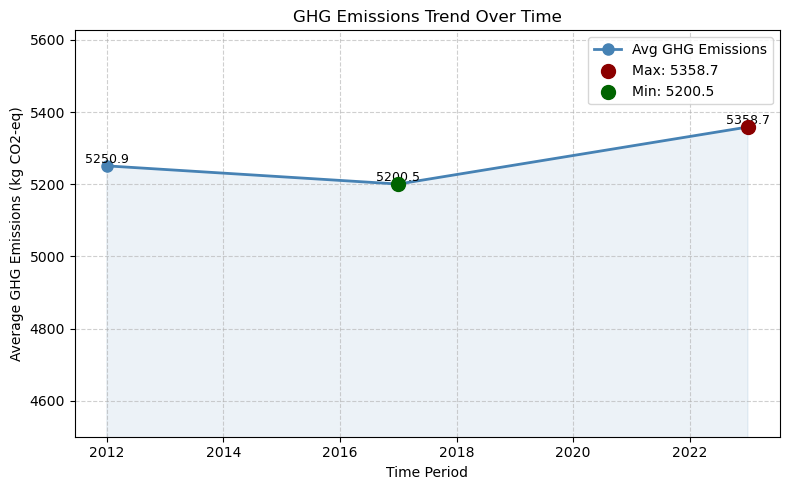

In [41]:
import matplotlib.pyplot as plt
import os

# Ensure images folder exists
os.makedirs("../images", exist_ok=True)

# Prepare data
df["Time_Period_Numeric"] = df["Time_Period_Numeric"].astype(int)
trend_data = df.groupby("Time_Period_Numeric")["Greenhouse Gas Emissions (kg CO2-eq)"].mean()

plt.figure(figsize=(8,5))

# Main line plot
plt.plot(trend_data.index, trend_data.values, 
         marker="o", color="steelblue", linewidth=2, markersize=8, label="Avg GHG Emissions")

# Fill under the curve for a subtle effect
plt.fill_between(trend_data.index, trend_data.values, 
                 color="steelblue", alpha=0.1)

# Data labels
for x, y in zip(trend_data.index, trend_data.values):
    plt.text(x, y, f"{y:.1f}", ha="center", va="bottom", fontsize=9)

# Highlight max & min
max_x, max_y = trend_data.idxmax(), trend_data.max()
min_x, min_y = trend_data.idxmin(), trend_data.min()
plt.scatter(max_x, max_y, color="darkred", s=100, zorder=3, label=f"Max: {max_y:.1f}")
plt.scatter(min_x, min_y, color="darkgreen", s=100, zorder=3, label=f"Min: {min_y:.1f}")

# Optional: smoothed line
# trend_data_smooth = trend_data.rolling(window=2, center=True).mean()
# plt.plot(trend_data.index, trend_data_smooth, color="orange", linestyle="--", label="Smoothed Trend")

plt.xlabel("Time Period")
plt.ylabel("Average GHG Emissions (kg CO2-eq)")
plt.title("GHG Emissions Trend Over Time")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()

# ✅ Custom y-axis scale starting at 5200
plt.ylim(4500, trend_data.max() * 1.05)

plt.tight_layout()

# Save figure
plt.savefig("../images/ghg_emissions_trend.png", dpi=300, bbox_inches="tight")
plt.show()


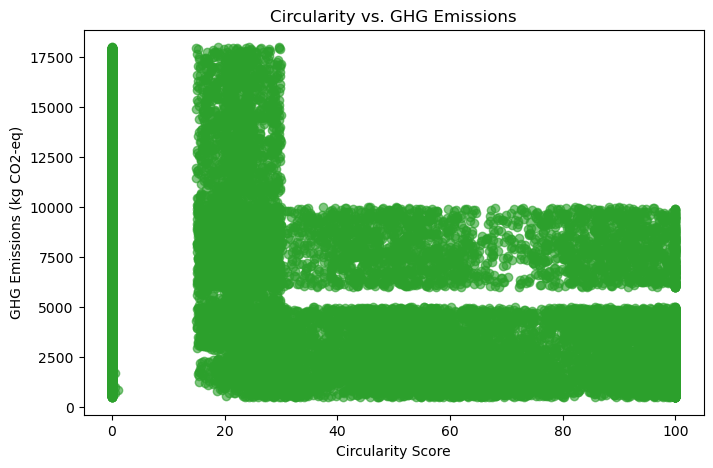

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df["Circularity_Score"], df["Greenhouse Gas Emissions (kg CO2-eq)"], c='tab:green', alpha=0.6)
plt.xlabel("Circularity Score")
plt.ylabel("GHG Emissions (kg CO2-eq)")
plt.title("Circularity vs. GHG Emissions")
plt.show()


<Figure size 1000x500 with 0 Axes>

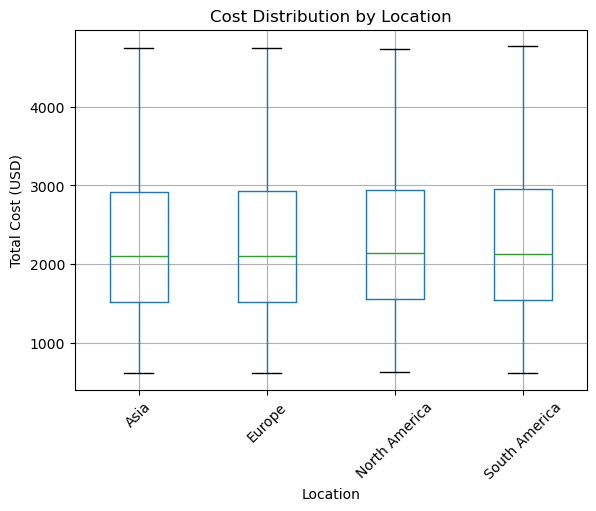

In [16]:
plt.figure(figsize=(10,5))
df.boxplot(column="Total_Cost", by="Location")
plt.ylabel("Total Cost (USD)")
plt.title("Cost Distribution by Location")
plt.suptitle("")  # remove default pandas title
plt.xticks(rotation=45)
plt.show()


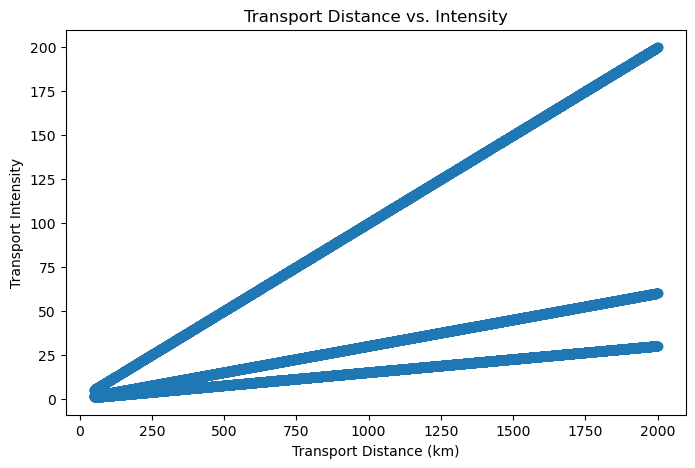

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df["Transport Distance (km)"], df["Transport_Intensity"], c='tab:blue', alpha=0.7)
plt.xlabel("Transport Distance (km)")
plt.ylabel("Transport Intensity")
plt.title("Transport Distance vs. Intensity")
plt.show()


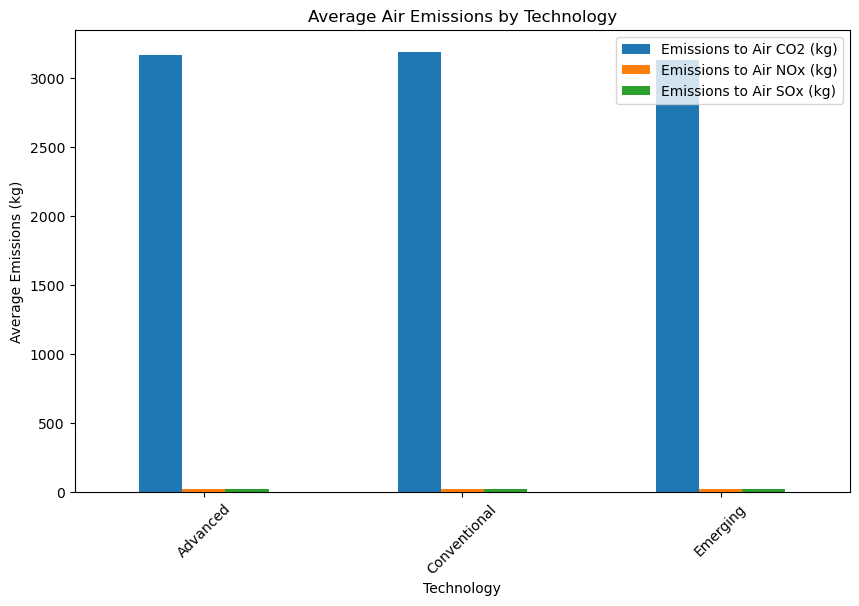

In [18]:
df.groupby("Technology")[["Emissions to Air CO2 (kg)", "Emissions to Air NOx (kg)", "Emissions to Air SOx (kg)"]].mean().plot(
    kind="bar", figsize=(10,6)
)
plt.ylabel("Average Emissions (kg)")
plt.title("Average Air Emissions by Technology")
plt.xticks(rotation=45)
plt.show()


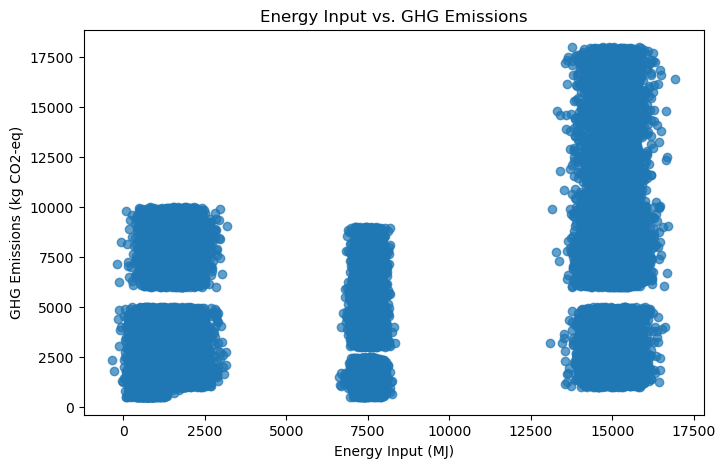

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df["Energy Input Quantity (MJ)"], df["Greenhouse Gas Emissions (kg CO2-eq)"], alpha=0.7)
plt.xlabel("Energy Input (MJ)")
plt.ylabel("GHG Emissions (kg CO2-eq)")
plt.title("Energy Input vs. GHG Emissions")
plt.show()



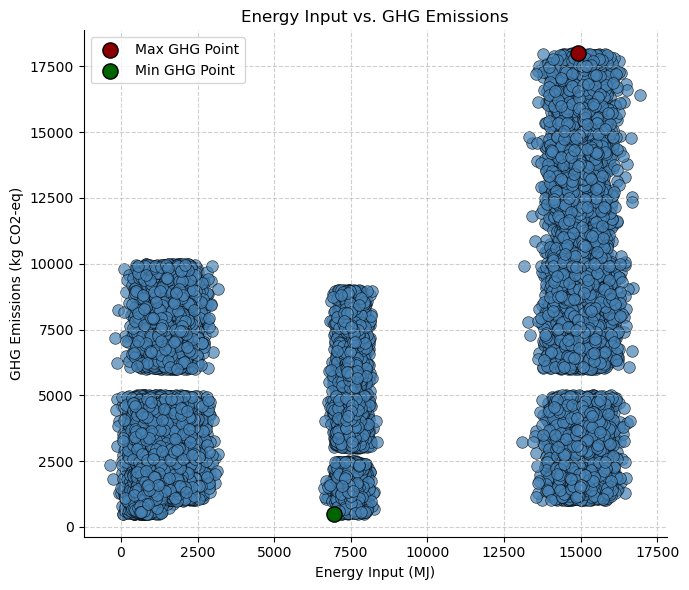

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

# Scatter plot with improved styling
plt.scatter(df["Energy Input Quantity (MJ)"], 
            df["Greenhouse Gas Emissions (kg CO2-eq)"], 
            alpha=0.7, color="steelblue", edgecolor="black", linewidth=0.5, s=70)

# Highlight max & min GHG points
max_idx = df["Greenhouse Gas Emissions (kg CO2-eq)"].idxmax()
min_idx = df["Greenhouse Gas Emissions (kg CO2-eq)"].idxmin()

plt.scatter(df.loc[max_idx, "Energy Input Quantity (MJ)"], 
            df.loc[max_idx, "Greenhouse Gas Emissions (kg CO2-eq)"],
            color="darkred", s=120, edgecolor="black", label="Max GHG Point", zorder=3)

plt.scatter(df.loc[min_idx, "Energy Input Quantity (MJ)"], 
            df.loc[min_idx, "Greenhouse Gas Emissions (kg CO2-eq)"],
            color="darkgreen", s=120, edgecolor="black", label="Min GHG Point", zorder=3)

# Labels & title
plt.xlabel("Energy Input (MJ)")
plt.ylabel("GHG Emissions (kg CO2-eq)")
plt.title("Energy Input vs. GHG Emissions")

# Grid & theme
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

# Save figure
plt.savefig("../images/energy_vs_ghg.png", dpi=300, bbox_inches="tight")
plt.show()


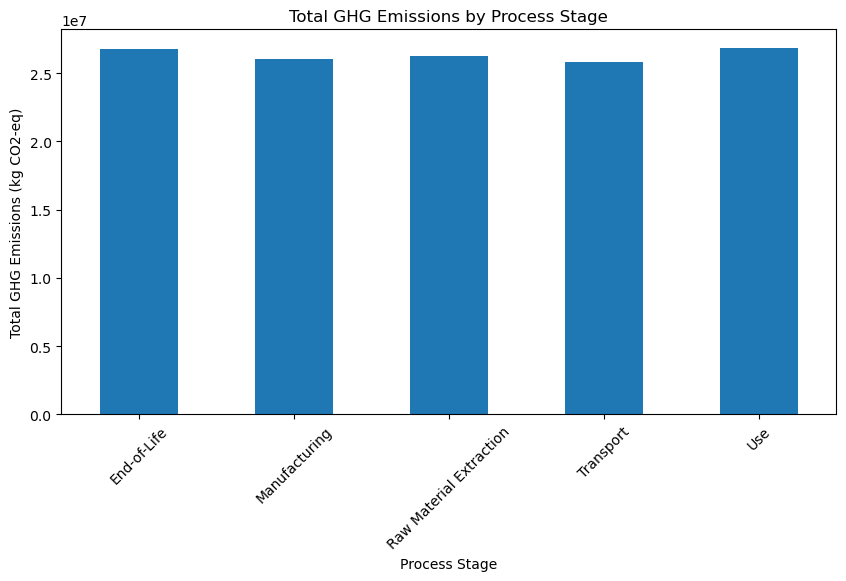

In [20]:
import matplotlib.pyplot as plt

df.groupby("Process Stage")["Greenhouse Gas Emissions (kg CO2-eq)"].sum().plot(
    kind="bar", figsize=(10,5)
)
plt.ylabel("Total GHG Emissions (kg CO2-eq)")
plt.title("Total GHG Emissions by Process Stage")
plt.xticks(rotation=45)
plt.show()


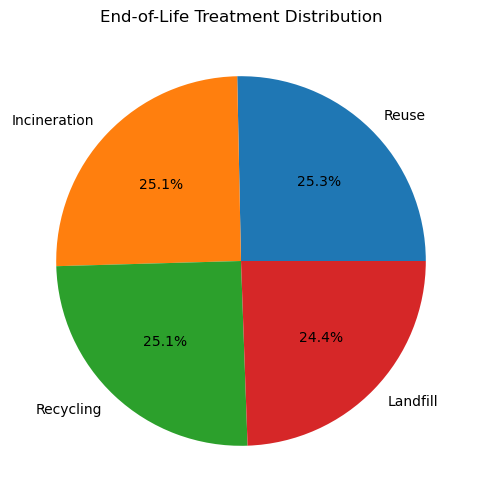

In [21]:
df["End-of-Life Treatment"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", figsize=(6,6)
)
plt.ylabel("")
plt.title("End-of-Life Treatment Distribution")
plt.show()


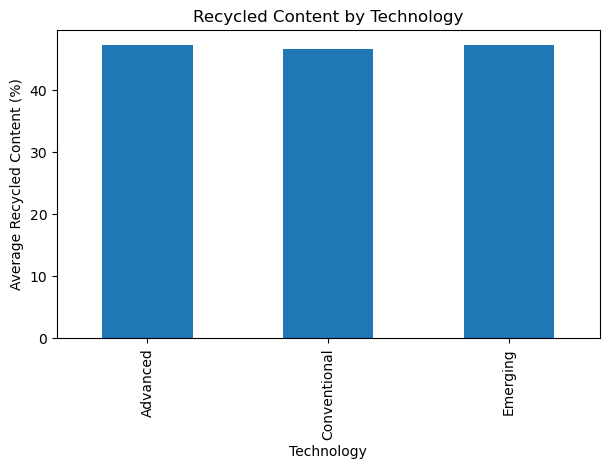

In [22]:
df.groupby("Technology")["Recycled Content (%)"].mean().plot(
    kind="bar", figsize=(7,4)
)
plt.ylabel("Average Recycled Content (%)")
plt.title("Recycled Content by Technology")
plt.show()


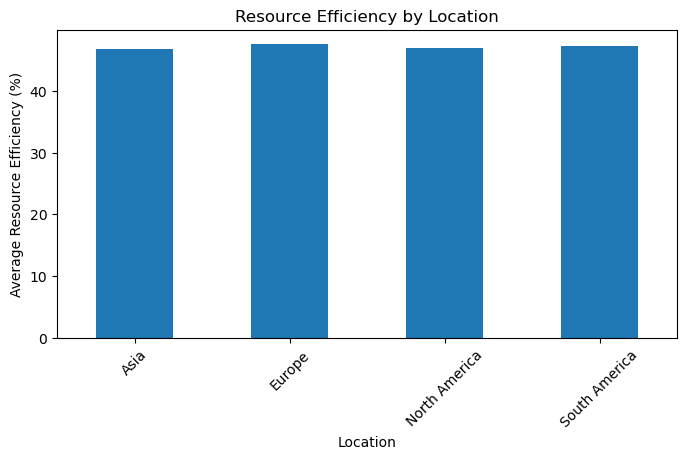

In [23]:
df.groupby("Location")["Resource Efficiency (%)"].mean().plot(
    kind="bar", figsize=(8,4)
)
plt.ylabel("Average Resource Efficiency (%)")
plt.title("Resource Efficiency by Location")
plt.xticks(rotation=45)
plt.show()


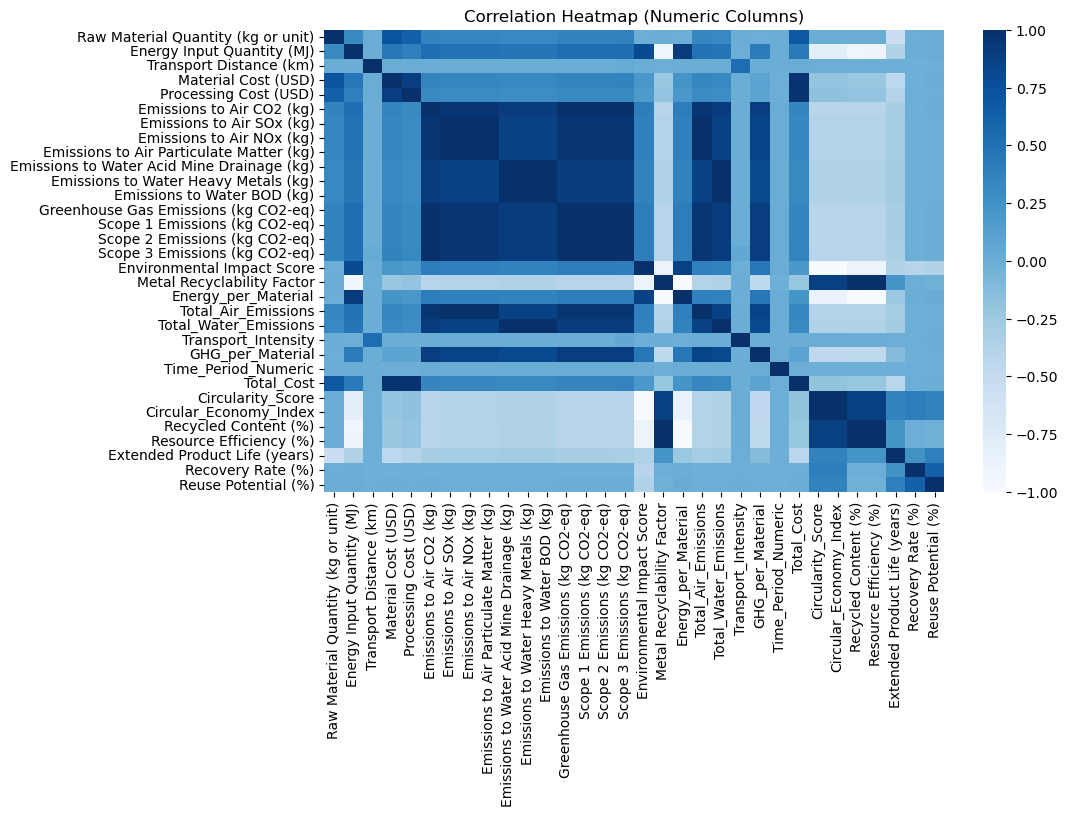

In [24]:
import seaborn as sns

numeric_cols = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), cmap="Blues", annot=False)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


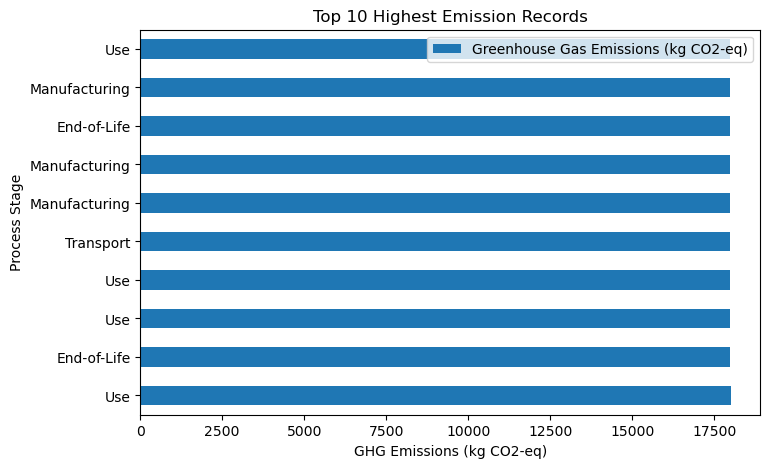

In [25]:
top_10 = df.nlargest(10, "Greenhouse Gas Emissions (kg CO2-eq)")
top_10.plot(
    x="Process Stage", y="Greenhouse Gas Emissions (kg CO2-eq)", 
    kind="barh", figsize=(8,5)
)
plt.xlabel("GHG Emissions (kg CO2-eq)")
plt.title("Top 10 Highest Emission Records")
plt.show()


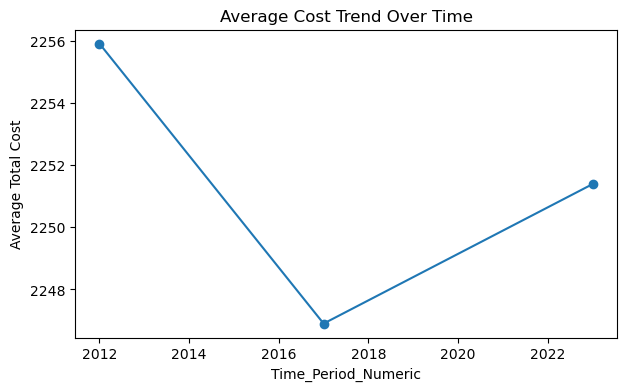

In [26]:
df.groupby("Time_Period_Numeric")["Total_Cost"].mean().plot(
    kind="line", marker="o", figsize=(7,4)
)
plt.ylabel("Average Total Cost")
plt.title("Average Cost Trend Over Time")
plt.show()
